#**Install Requirement Library**

In [1]:
!pip install anytree
!pip install basemap
!pip install mycolorpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 16.6 MB/s eta 0:00:00


  Preparing metadata (setup.py) ... done
  Created wheel for mycolorpy: filename=mycolorpy-1.5.1-py3-none-any.whl size=3853 sha256=48beee72eeff1bc3d3c737c27fb093af079f54f0900b90226c3839260a0cc699
  Stored in directory: /root/.cache/pip/wheels/d6/1d/04/f8bfb8b04e3daba330b3f377c041b89304271ff98fb6704946
Successfully built mycolorpy


#**Import Library**

In [2]:
import pandas as pd
import numpy as np
import graphviz
import math
import seaborn as sns

from datetime import datetime
from matplotlib import pyplot as plt
from IPython.display import Image
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
from datetime import timedelta
from scipy import optimize
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import timedelta, datetime
from mycolorpy import colorlist as mcp

%matplotlib inline

#**Read Dataset**

In [3]:
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/QueryCountryIndonesia(1910-2016)USGS.csv"
df = pd.read_csv(dataset)
df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-12-31T17:22:51.700Z,1.0439,126.5326,42.38,4.0,mb,NaN,197.0,0.876,0.98,...,2017-03-23T22:52:11.040Z,"97km WNW of Kota Ternate, Indonesia",earthquake,11.8,27.3,0.183,8.0,reviewed,us,us
1,2016-12-31T07:21:08.220Z,-6.0786,130.0318,137.85,4.6,mb,NaN,82.0,2.271,0.86,...,2017-03-23T22:52:10.040Z,"250km NW of Saumlaki, Indonesia",earthquake,8.9,8.2,0.122,20.0,reviewed,us,us
2,2016-12-30T08:24:53.620Z,-9.1767,123.5689,116.02,4.6,mb,NaN,59.0,0.897,0.89,...,2017-03-23T22:52:09.040Z,"51km NNW of Naisano Dua, Indonesia",earthquake,7.7,6.6,0.110,25.0,reviewed,us,us
3,2016-12-30T07:10:05.390Z,1.7358,126.5028,42.15,5.0,mb,NaN,92.0,1.289,0.95,...,2017-03-23T22:52:09.040Z,"142km NW of Kota Ternate, Indonesia",earthquake,7.8,7.4,0.075,57.0,reviewed,us,us
4,2016-12-30T06:41:20.480Z,-9.1597,118.7325,105.58,4.4,mb,NaN,81.0,3.502,0.64,...,2017-03-23T22:52:09.040Z,"45km SSE of Tolotangga, Indonesia",earthquake,6.7,8.6,0.134,16.0,reviewed,us,us


#**Gambaran Secara Statistik Kejadian Gempa**

In [4]:
# Total kejadian gempa
N_tot = df['mag'].count()
print('Total Kejadian Gempa sejak **1910 hingga 2016**', N_tot)
print('Rata-rata jumlah kejadian per pekan:', round(N_tot/(52*(2016-1910+1)),2) )
print('Rata-rata jumlah kejadian per tahun:', round(N_tot/((2016-1910+1)),2) )

# Daftar Kejadian gempa terbesar
print('Manitudo gempa terbesar:')
df[['mag','time','place']].sort_values('mag',ascending=False).head(5)

Total Kejadian Gempa sejak **1910 hingga 2016** 54920
Rata-rata jumlah kejadian per pekan: 9.87
Rata-rata jumlah kejadian per tahun: 513.27
Manitudo gempa terbesar:


,mag,time,place
25691,9.1,2004-12-26T00:58:53.450Z,off the west coast of northern Sumatra
25196,8.6,2005-03-28T16:09:36.530Z,"northern Sumatra, Indonesia"
54800,8.5,1938-02-01T19:04:22.000Z,Banda Sea
17546,8.4,2007-09-12T11:10:26.830Z,"southern Sumatra, Indonesia"
54911,8.3,1918-08-15T12:18:21.000Z,"Mindanao, Philippines"


In [5]:
#Object Date Time
df['dt_time'] = df['time'].apply(lambda x:
                                 datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%fZ'))

# Column year, month, and day
df['dofy'] = df['dt_time'].apply(lambda x: x.strftime("%j"))
df['dofy'] = df['dofy'].astype(str).astype(int)

df['year'] = df['dt_time'].apply(lambda x: x.year)
df['month'] = df['dt_time'].apply(lambda x: x.month)
df['day'] = df['dt_time'].apply(lambda x: x.day)

# Menghitung jumlah kejadian gempa per waktu (DMY)
dofy_tot = df['dofy'].value_counts(sort=True)
dofy_tot.sort_index(axis=0, inplace=True)

year_tot = df['year'].value_counts(sort=True)
month_tot = df['month'].value_counts(sort=True)
day_tot = df['day'].value_counts(sort=True)

# Menghitung rata-rata kejadian gempa per waktu (DMY)
year_ave = year_tot.mean()
dofy_ave = dofy_tot.mean()
month_ave = month_tot.mean()

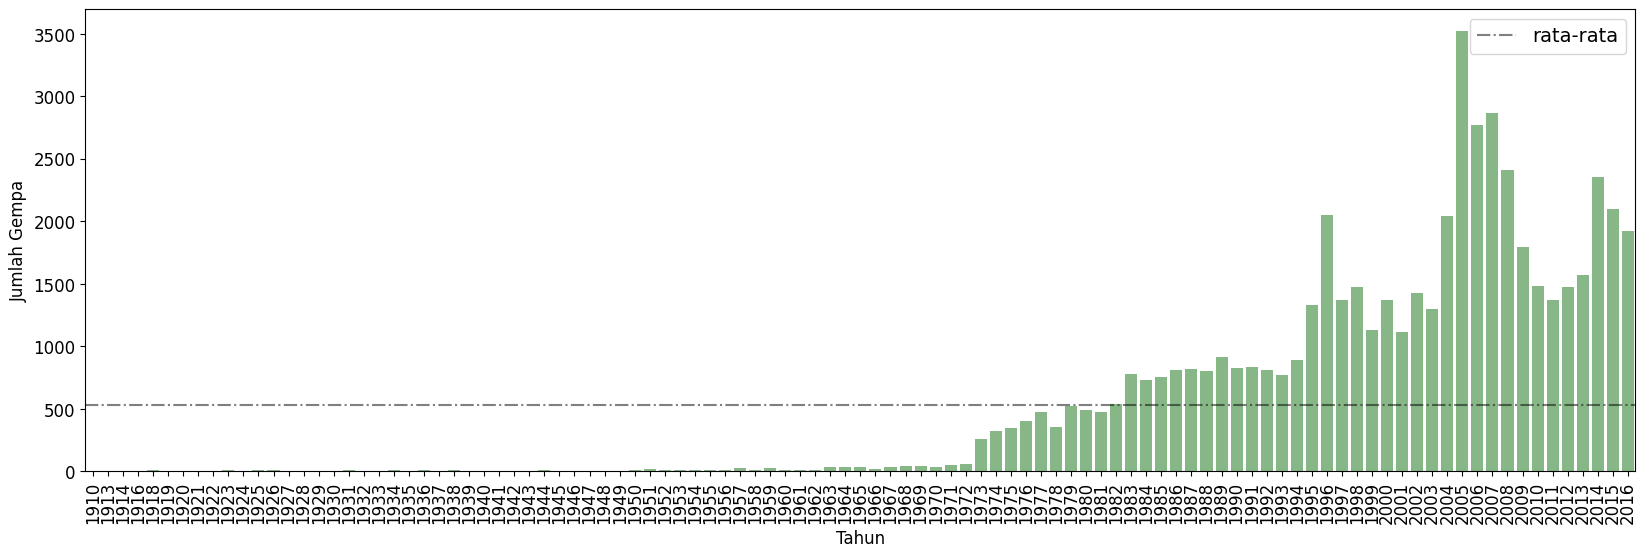

In [6]:
# Plot Bar Chart
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 14

plt.figure(figsize=(20,6))

sns.barplot(x=year_tot.index, y=year_tot.values, alpha=0.5, color='green')
plt.axhline(y=year_ave, color='k', linestyle='-.',
            alpha=0.5, label='rata-rata')
plt.xlabel('Tahun'), plt.ylabel('Jumlah Gempa')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


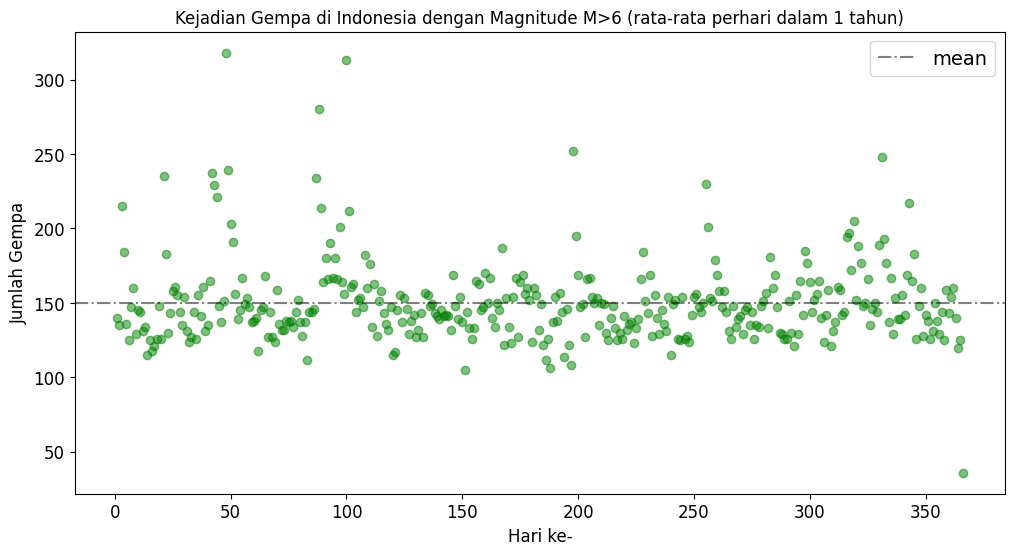

In [7]:
plt.figure(figsize=(12,6))

plt.plot(dofy_tot.index, dofy_tot.values ,'go', alpha=0.5)
plt.axhline(y=dofy_ave, color='k',linestyle='-.',alpha=0.5,label='mean')
plt.ylabel('Jumlah Gempa'), plt.xlabel('Hari ke-')
plt.title('Kejadian Gempa di Indonesia dengan Magnitude M>6 (rata-rata perhari dalam 1 tahun)')
plt.legend()
plt.show()

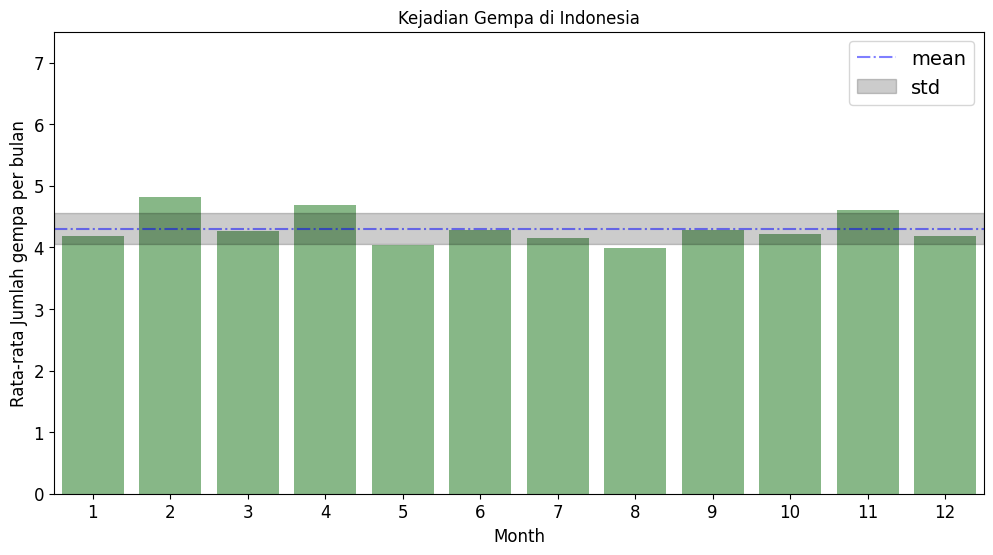

In [8]:
# Array of month lengths
month_length = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
# Sort by month index
month_sort = month_tot.sort_index()
# Normalize by the length of the month
month_norm = month_sort.values / (month_length*(2017-1983+1))

# Plot (including daily average and the deviation)
plt.figure(figsize=(12,6))

ax = sns.barplot(x=month_sort.index, y=month_norm, alpha=0.5, color='green')
ax.set_ylim([0, 7.5])
plt.axhline(y=np.mean(month_norm), color='b', linestyle='-.',
            alpha=0.5, label='mean')
plt.axhspan(np.mean(month_norm)-np.std(month_norm),
            np.mean(month_norm)+np.std(month_norm),
            color='k', alpha=0.2, label='std')
plt.ylabel('Rata-rata Jumlah gempa per bulan'), plt.xlabel('Month')
plt.title('Kejadian Gempa di Indonesia')
plt.legend()
plt.show()

#**Visualisasi Lokasi Gempa**

In [17]:
import folium
import pandas as pd

# URL menuju file CSV di GitHub (gunakan tautan "Raw")
#github_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/USGS/database_original.csv"
github_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/QueryCountryIndonesia(1910-2016)USGS.csv"
#df = pd.read_csv(dataset)

# Baca dataset ke dalam DataFrame
df = pd.read_csv(github_url, sep=',')

# Buat peta dengan lokasi tengah Indonesia sebagai pusat
m = folium.Map(location=[-2.4833826, 117.8902853], zoom_start=5)

# Tentukan rentang magnitudo dan warna yang sesuai
magnitude_ranges = [(5, 6, 'blue', 'Magnitude 5-6'),
                   (6.1, 7, 'green', 'Magnitude 6.1-7'),
                   (7.1, 8, 'orange', 'Magnitude 7.1-8'),
                   (8.1, 9, 'red', 'Magnitude 8.1-9')]

# Tambahkan marker untuk setiap gempa bumi pada peta dengan legend
for min_mag, max_mag, color, label in magnitude_ranges:
    mag_data = df[(df['mag'] >= min_mag) & (df['mag'] <= max_mag)]
    for index, row in mag_data.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=3,  # Ukuran marker
            color=color,  # Warna marker
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            popup=f"Mag: {row['mag']}, Depth: {row['depth']} km"  # Informasi dalam popup
        ).add_to(m)

# Tambahkan legend ke peta
legend_html = """
     <div style="position: fixed;
                 bottom: 50px; left: 50px; width: 150px; height: 120px;
                 background-color: white; opacity: 0.7; z-index:9999; font-size:12px;">
     <p><b>Legenda</b></p>
     <p><i class="fa fa-circle" style="color:blue"></i>Magnitude: 5-6</p>
     <p><i class="fa fa-circle" style="color:green"></i>Magnitude: 6.1-7</p>
     <p><i class="fa fa-circle" style="color:orange"></i>Magnitude: 7.1-8</p>
     <p><i class="fa fa-circle" style="color:red"></i>Magnitude: 8.1-9</p>
      </div>
     """

m.get_root().html.add_child(folium.Element(legend_html))

# Menyimpan peta ke file HTML
m.save("earthquake_map.html")

# Tampilkan peta di dalam notebook
m


Output hidden; open in https://colab.research.google.com to view.

##**Frequncy**

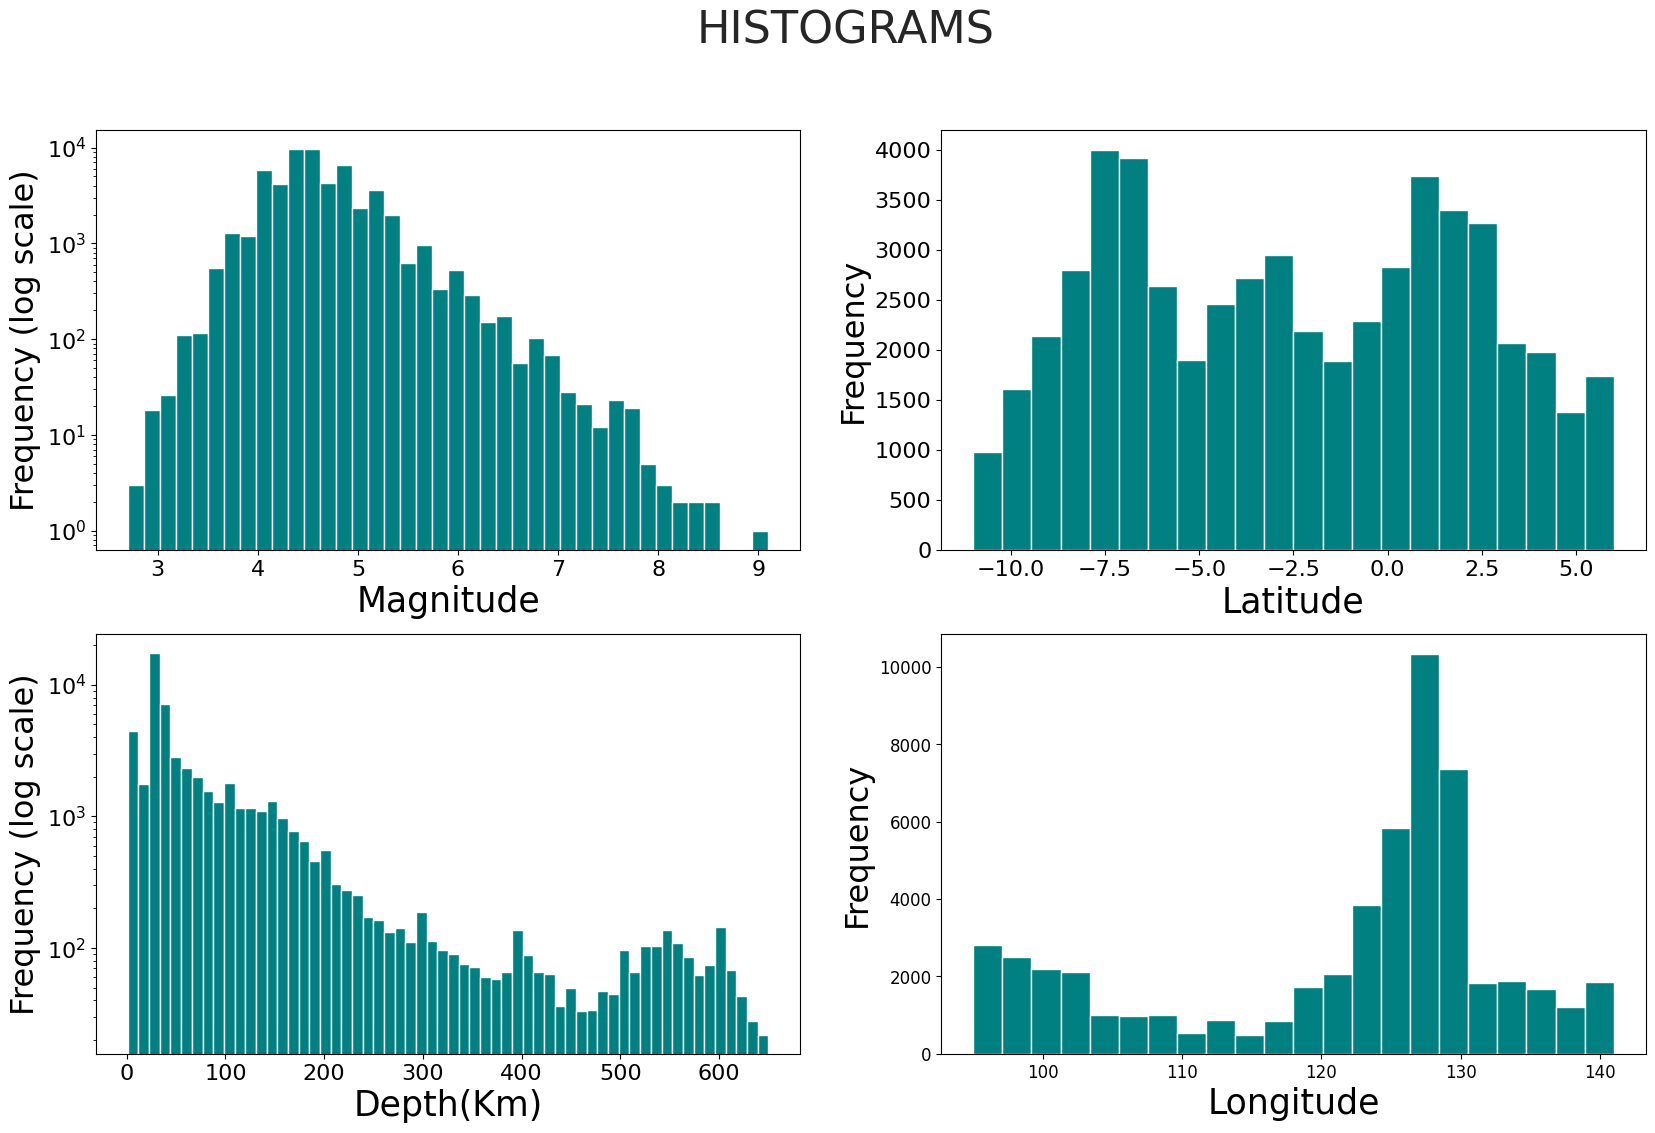

In [18]:
#fig=plt.figure()
fig,axes=plt.subplots(2,2,figsize=(20,12))
sns.set(style="ticks", palette="pastel")
fig.suptitle('HISTOGRAMS',fontsize=32)
# Draw a nested boxplot
axes[0][0].hist(df['mag'],bins=40,color='teal')
axes[1][0].hist(df['depth'],bins=60,color='teal')
axes[0][1].hist(df['latitude'],bins=22,color='teal')
axes[1][1].hist(df['longitude'],bins=22,color='teal')
#plt.hist(DATA['Time'],ax=axes[0][])
for i in range(2):
    for j in range(2):
        ax = axes[i,j]
        if i == 0 and j==0:
            title = ax.set_xlabel("Magnitude",fontsize=25) #set font and title of x label
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=23) #set font and title of y label
            ax.set_yscale('log') #set log scale
            ax.tick_params(labelsize=16) #change labelsize
        elif i == 1 and j==0:
            title = ax.set_xlabel("Depth(Km)",fontsize=25)
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=23)
            ax.set_yscale('log')
            ax.tick_params(labelsize=16)
        elif i == 0 and j==1:
            title = ax.set_xlabel("Latitude",fontsize=25  )
            title2 = ax.set_ylabel("Frequency",fontsize=23)
            ax.tick_params(labelsize=16)
        elif i==1 and j == 1:
            title = ax.set_xlabel("Longitude", fontsize=25 )
            title2 = ax.set_ylabel("Frequency",fontsize=23)


**Depth, Latitude**

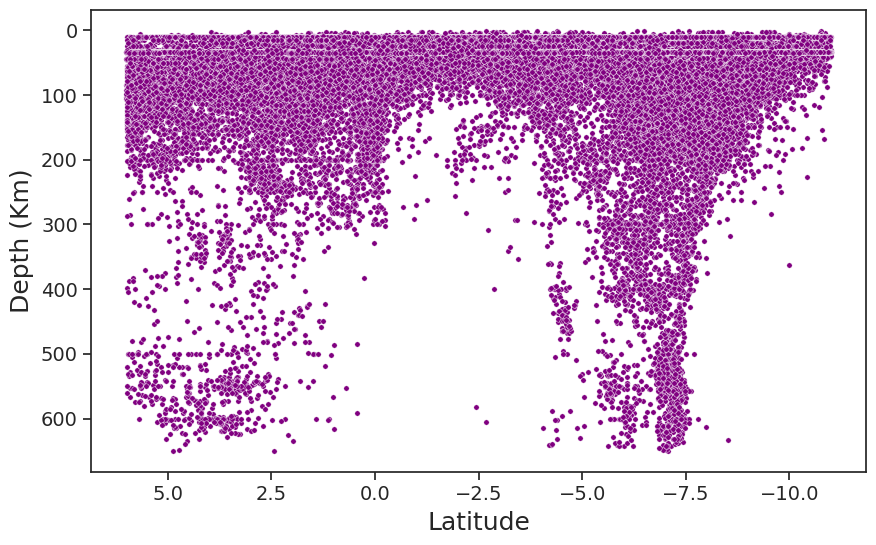

In [19]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(x=df['latitude'],y=df['depth'],s=15,color='purple')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel("Latitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth (Km)',fontsize=18,labelpad=5) #set font and title of y label
#plt.yscale('log')
plt.tick_params(labelsize=14) #change labelsize

#**Depth, Longitude**

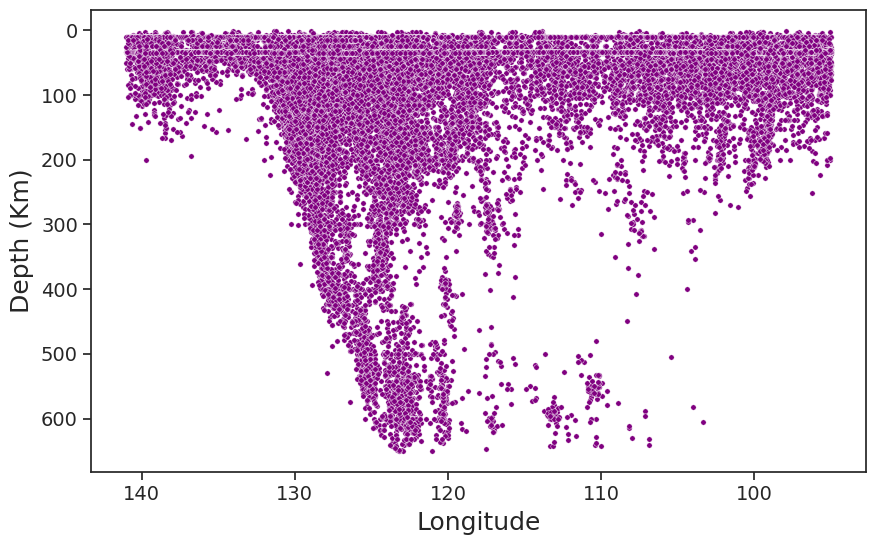

In [20]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(x=df['longitude'],y=df['depth'],s=15,color='purple')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel("Longitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth (Km)',fontsize=18,labelpad=5) #set font and title of y label
#plt.yscale('log')
plt.tick_params(labelsize=14) #change labelsize